In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 확인 및 전처리

In [2]:
bank = pd.read_csv('/content/drive/MyDrive/2ndProject/BankChurners.csv')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [3]:
bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [4]:
# NULL값 없고 깨끗
# Naive Bayes 추정치는 별로 안 중요한 거 같아서 삭제
bank = bank.iloc[:, :21]
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
bank['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [7]:
# flag를 1, 0으로 변경
bank['Attrition_Flag'] = bank['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})
bank['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [8]:
bank['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [9]:
# 카드 등급에 따라 0~3으로 변경
bank['Card_Category'] = bank['Card_Category'].map({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})
bank['Card_Category'].value_counts()

Card_Category
0    9436
1     555
2     116
3      20
Name: count, dtype: int64

In [10]:
bank['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [11]:
# M은 1, F는 0
bank['Gender'] = bank['Gender'].map({'M':1, 'F':0})
bank['Gender'].value_counts()

Gender
0    5358
1    4769
Name: count, dtype: int64

In [12]:
bank['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [13]:
# unknown = 0, 나머지는 1~6
bank['Education_Level'] = bank['Education_Level'].map({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
bank['Education_Level'].value_counts()

Education_Level
4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: count, dtype: int64

In [14]:
bank['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [15]:
# 결혼 여부. 모름 = 0, 싱글 1 결혼 2 이혼 3
bank['Marital_Status'] = bank['Marital_Status'].map({'Unknown':0, 'Single':1, 'Married':2, 'Divorced':3})
bank['Marital_Status'].value_counts()

Marital_Status
2    4687
1    3943
0     749
3     748
Name: count, dtype: int64

In [16]:
bank['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [17]:
income_map = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}
bank['Income_Category'] = bank['Income_Category'].map(income_map)
bank['Income_Category'].value_counts()

Income_Category
1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: count, dtype: int64

In [18]:
bank.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,0.470919,2.346203,2.601955,1.536585,2.085711,0.083638,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,1.700417,0.737808,1.474639,0.333784,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,0.000000,2.000000,3.000000,2.000000,2.000000,0.000000,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,1.000000,3.000000,4.000000,2.000000,3.000000,0.000000,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,...,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

숫자로 잘 변환된 것을 볼 수 있다

## 가설 설정
1. 나이가 적으면 적을수록 유지하지 않을 것 같다
2. 부양가족 수가 많으면 신용카드를 계속 유지할 것이다.
2-1. 부양가족 많으려면 결혼한 상태일 거 같은데...? Single이 아니면 신용카드 많이 사용?
3. card_category에서 낮은 등급 카드일수록 이탈률이 높을 것이다.
4. 보유한 상품 수가 적을수록 유지하지 않을 것이다.
5. 12mon 내 inactive가 높거나, contact가 낮으면 이탈률이 높을 것이다.
6. 신용 한도가 낮으면 이탈률이 높을 것이다.
7. total_revolving_bal이 있으면 이탈하기 힘들 것 같다. (돈을 갚아야 하니까?)
7-1. 너무 많으면 (예상으로는 대충 2000 이상?) 오히려 이탈할 것 같다. (카드 잘라서 소비 습관 잡으려고)
8. Avg_Open_To_Buy랑 리볼빙이랑 비슷하게 굴러가지 않을까?\
    
    8-1. 소비 습관이 안 좋으면 갚을 때까지 계속 카드를 써야 하니까 오래 사용할 듯
    
9. Q4_Q1이나 Total 금액이 낮을수록 이탈률이 높을 것이다.
    
    9-1. 이게 메인 카드가 아니니까 버리기도 쉬울 것 같다.

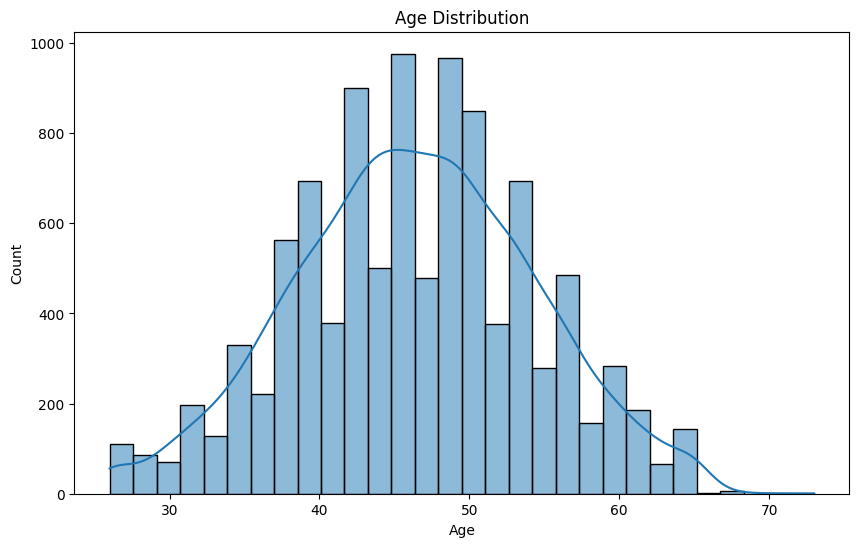

In [20]:
# 나이 분포 체크하기
plt.figure(figsize=(10, 6))
sns.histplot(bank['Customer_Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

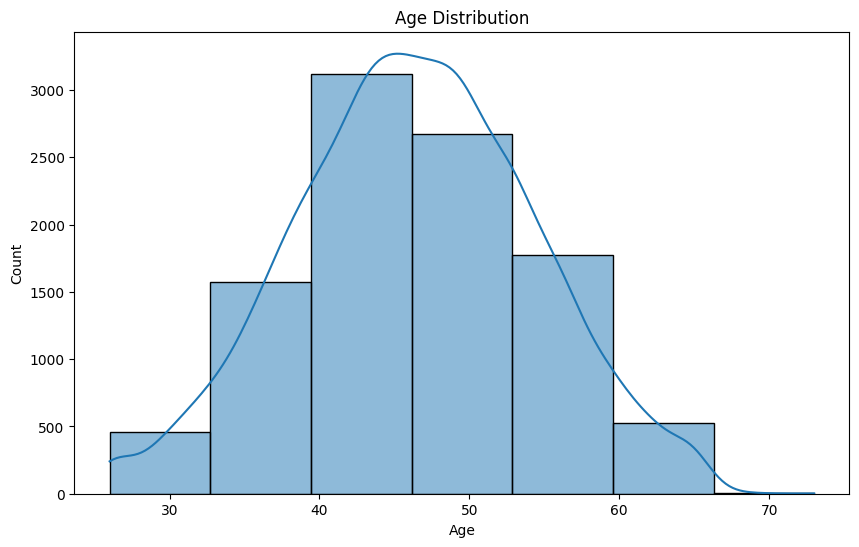

In [21]:
# bins 줄여서 나이대 대충 체크
plt.figure(figsize=(10, 6))
sns.histplot(bank['Customer_Age'], bins=7, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- 나이대는 다양하고 40대 중반~50대 초반이 제일 많은 것 같음
- 다른 데이터 볼 때도 그렇지만 40대가 제일 돈도 많고 활발하게 움직이는 나이대라 그런 듯

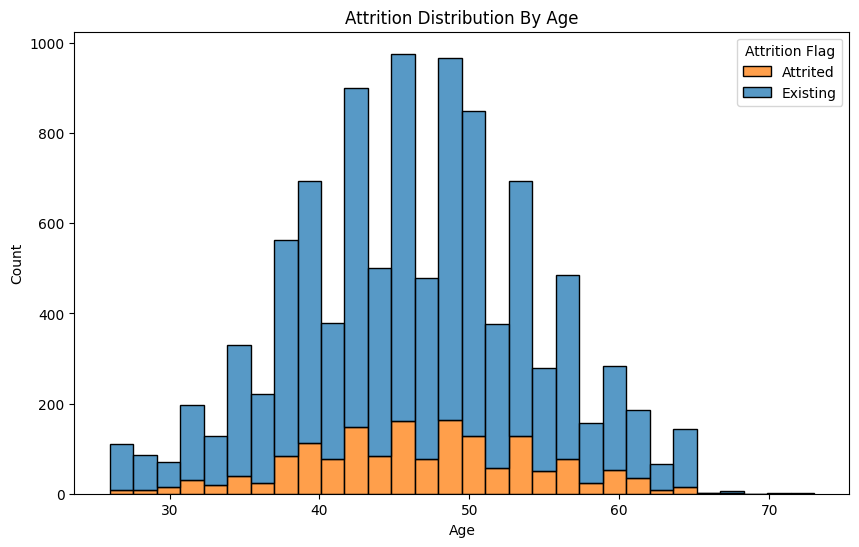

In [22]:
# 나이에 따른 flag
plt.figure(figsize=(10,6))
sns.histplot(data=bank, x='Customer_Age', hue='Attrition_Flag', multiple='stack', bins=30,kde=False)
plt.title('Attrition Distribution By Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition Flag', labels=['Attrited', 'Existing'])
plt.show()

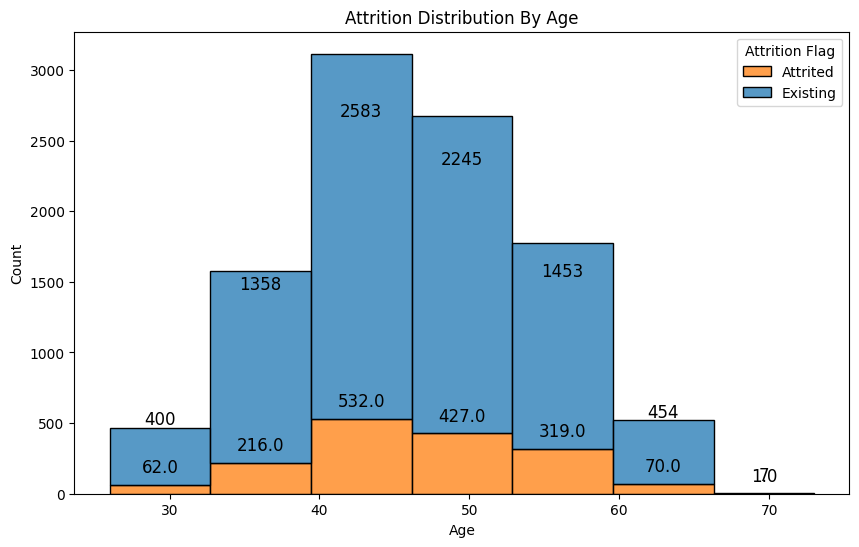

In [23]:
# 나이에 따른 flag
plt.figure(figsize=(10,6))
ax = sns.histplot(data=bank, x='Customer_Age', hue='Attrition_Flag', multiple='stack', bins=7,kde=False)
plt.title('Attrition Distribution By Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition Flag', labels=['Attrited', 'Existing'])

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 20),
                textcoords='offset points')

plt.show()

- 40대~60세미만 구간에서만 이탈률이 20%까지 올라감
- 나머지는 16% 전후

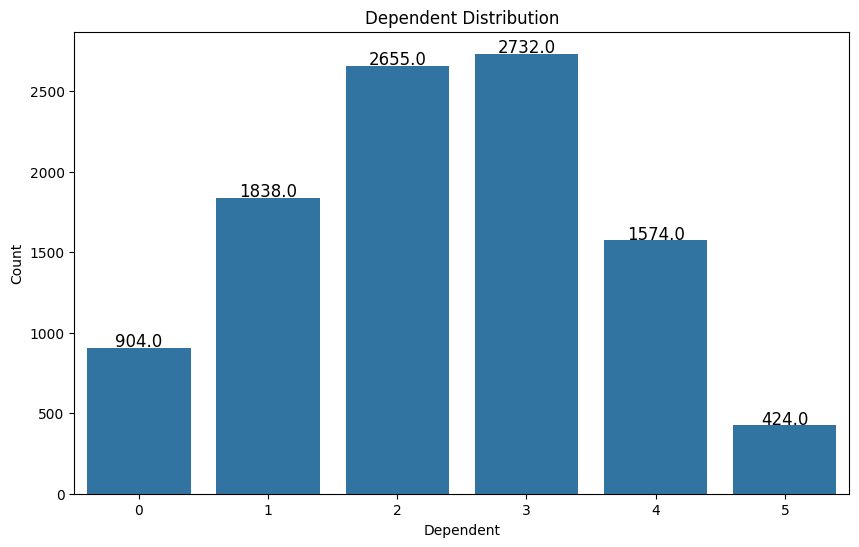

In [24]:
# 부양가족 분포
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Dependent_count', data=bank)
plt.title('Dependent Distribution')
plt.xlabel('Dependent')
plt.ylabel('Count')

# 그래프 위에 빈도수 표시
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 12),
                textcoords='offset points')

plt.show()

부양가족 2, 3명이 자식일까? 아니면 부모?

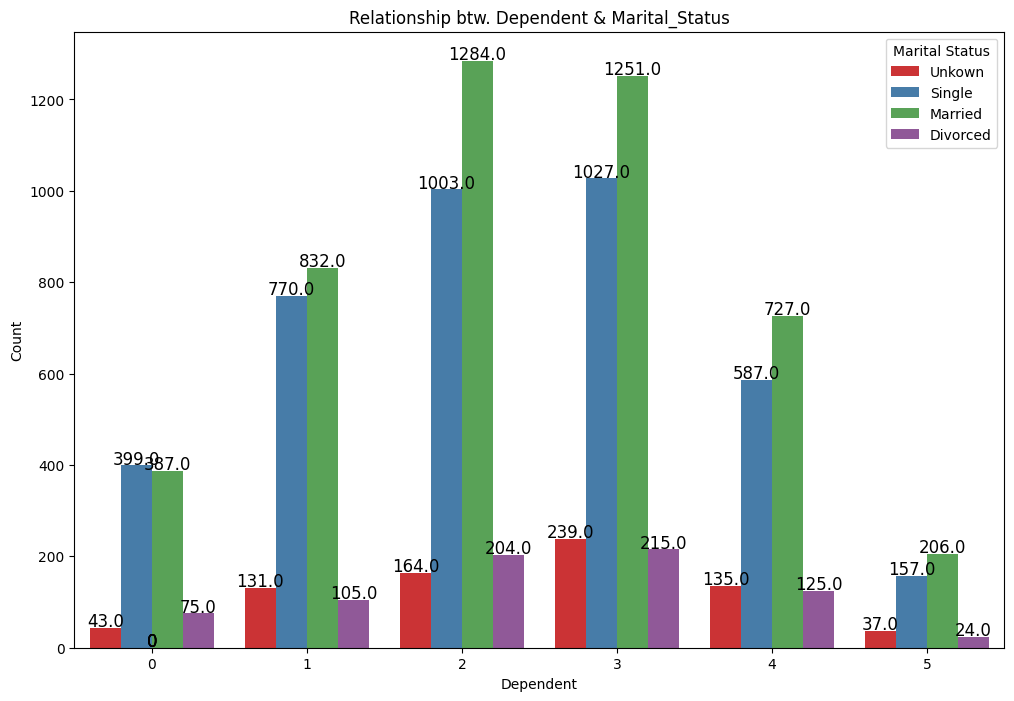

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Dependent_count', hue='Marital_Status', palette='Set1', data=bank)
plt.title('Relationship btw. Dependent & Marital_Status')
plt.xlabel('Dependent')
plt.ylabel('Count')
plt.legend(title='Marital Status', labels=['Unkown', 'Single', 'Married', 'Divorced'])

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 12),
                textcoords='offset points')
plt.show()

아니 이거 아까는 밑에랑 색 똑같았는데 갑자기 변함;; 뭐냐고

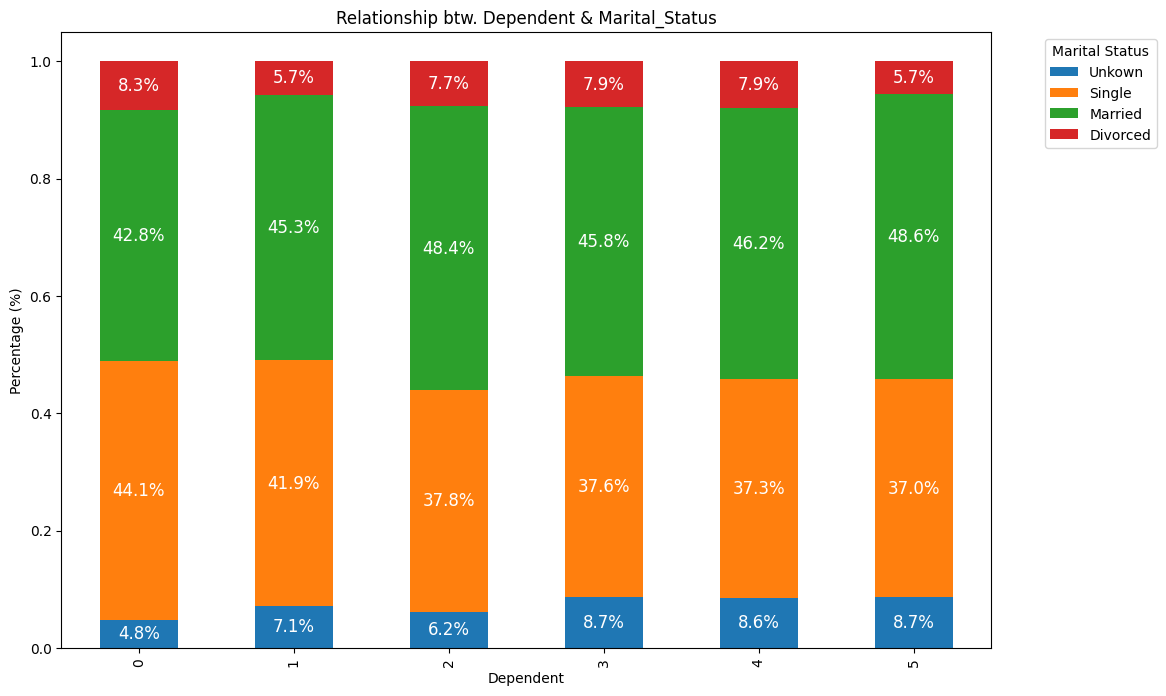

In [26]:
# Dependent와 Marital_Status의 관계를 100% 누적 그래프로 시각화 (비율 표시 추가)
dependent_marital_percent = bank.groupby(['Dependent_count', 'Marital_Status']).size().unstack()
dependent_marital_percent = dependent_marital_percent.div(dependent_marital_percent.sum(axis=1), axis=0)

ax = dependent_marital_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

# 그래프에 비율 표시
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height*100:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=12, color='white')

plt.title('Relationship btw. Dependent & Marital_Status')
plt.xlabel('Dependent')
plt.ylabel('Percentage (%)')
plt.legend(title='Marital Status', labels=['Unkown', 'Single', 'Married', 'Divorced'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


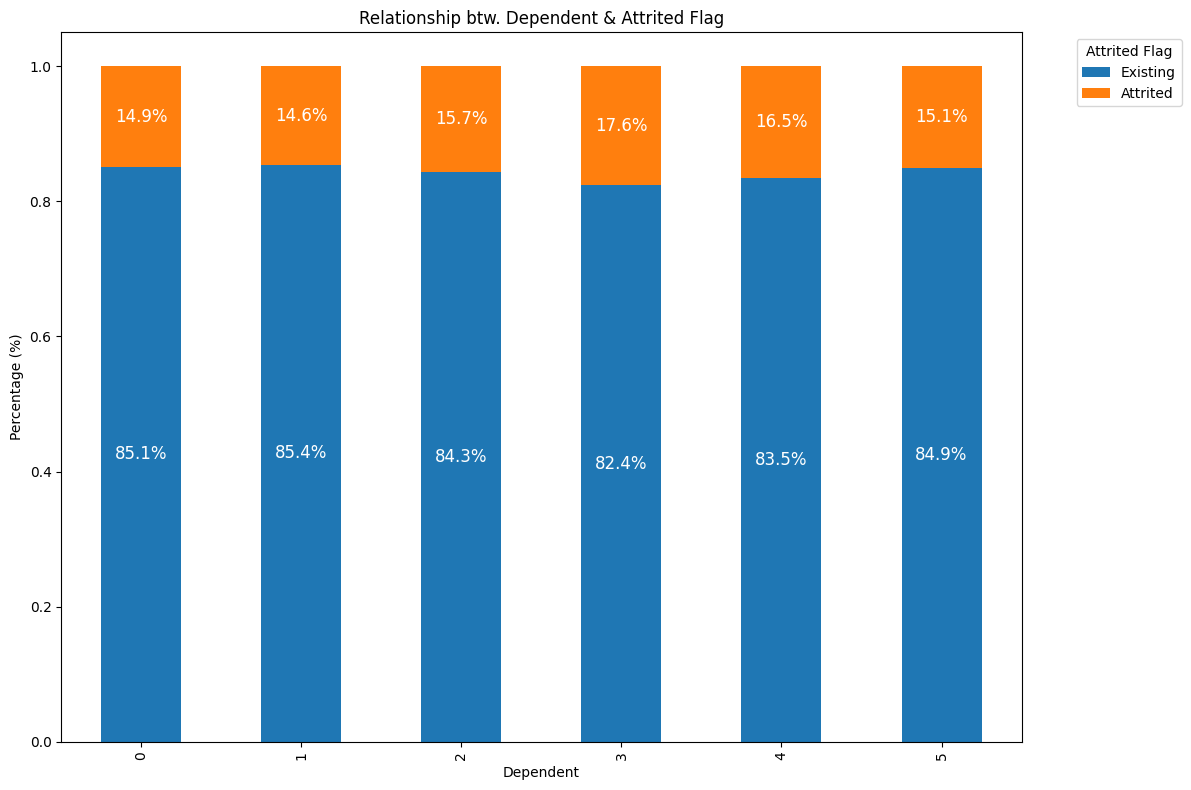

In [27]:
# Dependent와 Marital_Status의 관계를 100% 누적 그래프로 시각화 (비율 표시 추가)
dependent_attrition = bank.groupby(['Dependent_count', 'Attrition_Flag']).size().unstack()
dependent_attrition_pct = dependent_attrition.div(dependent_attrition.sum(axis=1), axis=0)

ax = dependent_attrition_pct.plot(kind='bar', stacked=True, figsize=(12, 8))

# 그래프에 비율 표시
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height*100:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=12, color='white')

plt.title('Relationship btw. Dependent & Attrited Flag')
plt.xlabel('Dependent')
plt.ylabel('Percentage (%)')
plt.legend(title='Attrited Flag', labels=['Existing', 'Attrited'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

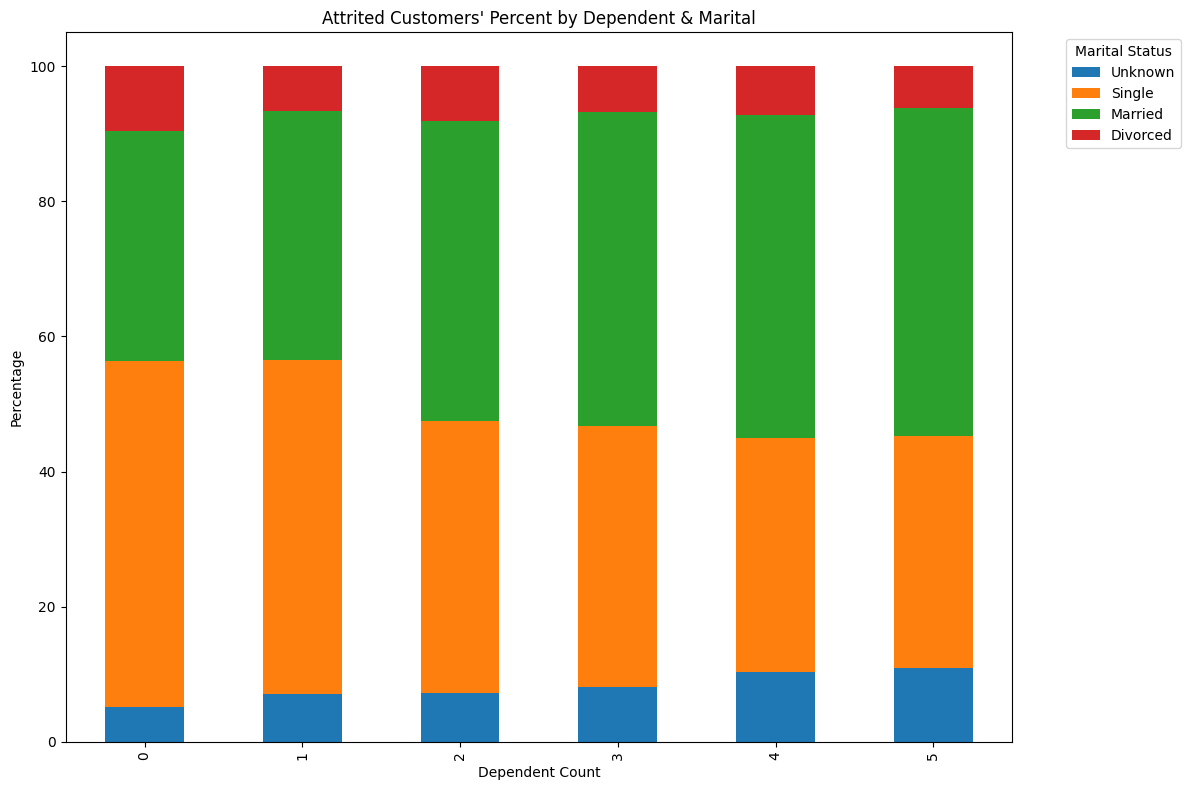

In [28]:
# 부양가족이랑 결혼 여부를 한번에 같이 보면 어떨까
# 넘 복잡하니까 이탈한 사람만...

attrited_data = bank[bank['Attrition_Flag'] == 1]
grouped_data = attrited_data.groupby(['Dependent_count', 'Marital_Status']).size().unstack(fill_value=0)

grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Attrited Customers\' Percent by Dependent & Marital')
plt.xlabel('Dependent Count')
plt.ylabel('Percentage')
plt.legend(title='Marital Status', labels=['Unknown', 'Single', 'Married', 'Divorced'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- 부양가족이랑 결혼 상태를 같이 체크 - 이탈한 유저만
    - 부양 가족 많아질수록 기혼자의 비율이 높아짐 (돈 나갈 데가 많으니까 좀 더 혜택 좋은 카드로 갈아탄다?)
    - 부양 가족 없는 싱글의 경우 애초에 경제활동 자체를 잘 안 해서 이탈률이 높은 게 아닌가? → 나이랑 같이 확인할 것.

In [29]:
bank['Income_Category'].value_counts()

Income_Category
1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: count, dtype: int64

<ipython-input-30-d8f43535718c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Income_Category', data=bank, palette='viridis')


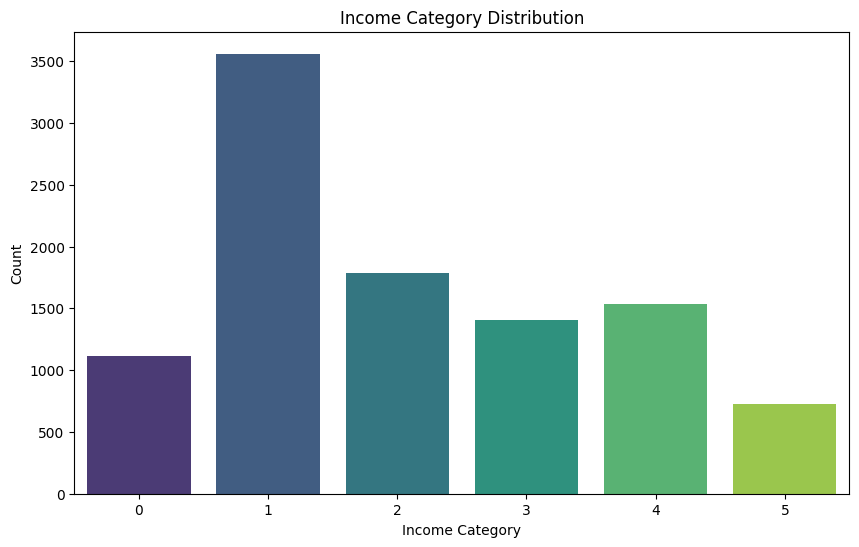

In [30]:
# income category
plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Category', data=bank, palette='viridis')
plt.title('Income Category Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

{ 'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}

걍 당연함

40k 달러는 한화 55,162,400원임


연봉 5천 이상이 이렇게 많다는 게 더 놀랍다

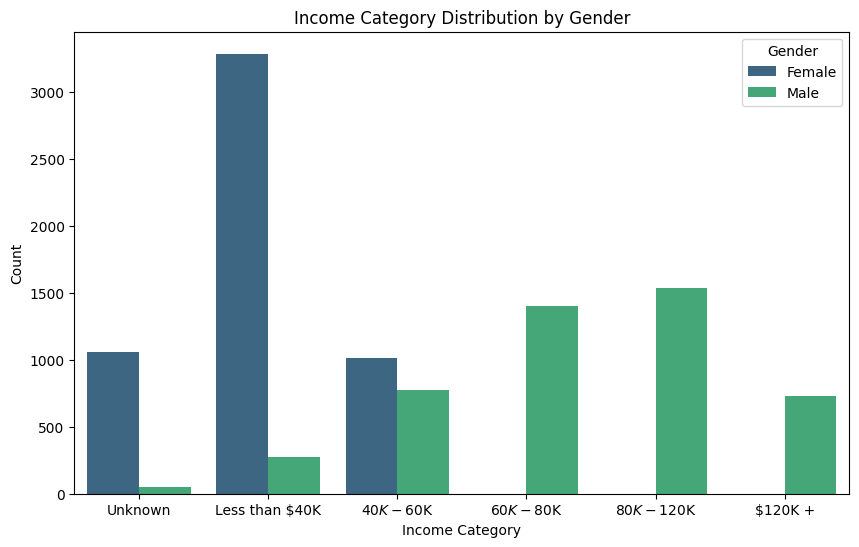

In [31]:
category_names = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Category', hue='Gender', data=bank, palette='viridis')
plt.title('Income Category Distribution by Gender')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(ticks=range(len(category_names)), labels=category_names)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

여자는 저소득층에 모여 있음... 뭐 어쩔 수 없죠

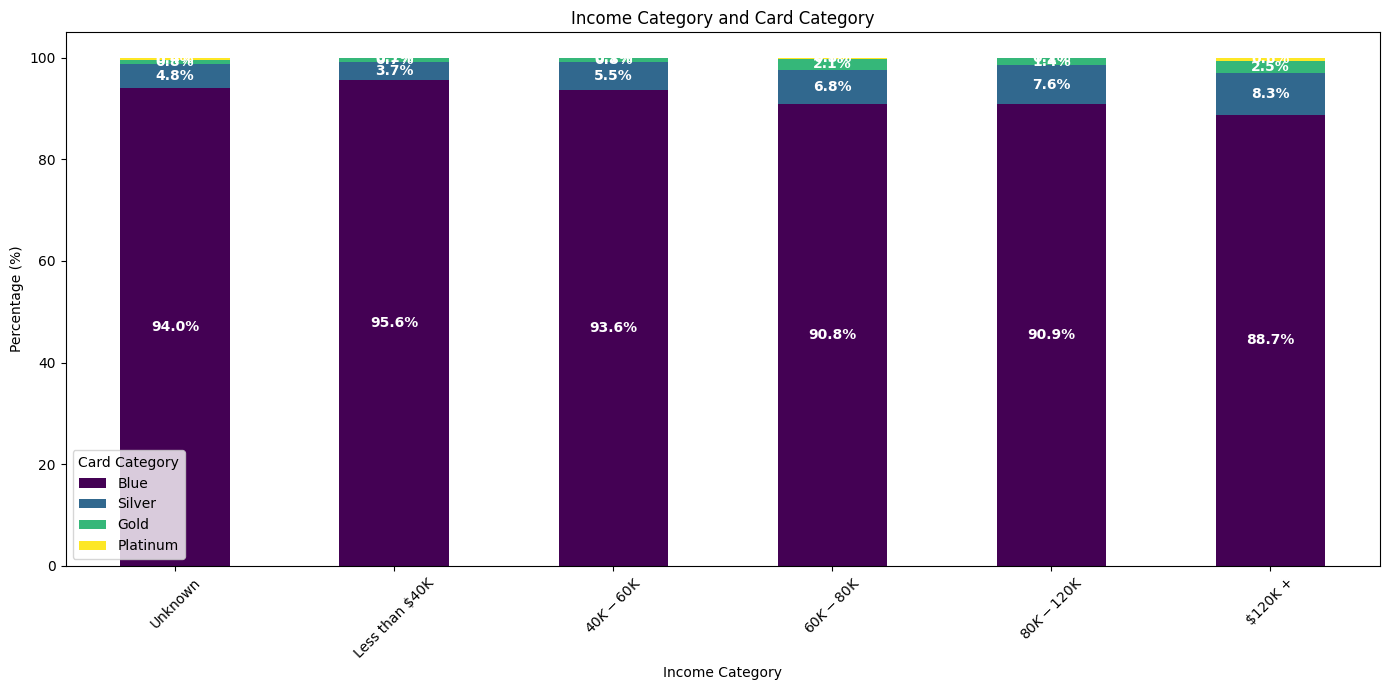

In [32]:
# 소득과 카드 등급의 차이

grouped_data = bank.groupby(['Income_Category', 'Card_Category']).size().unstack().fillna(0)
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(14, 7))
grouped_data_percentage.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# 각 바 위에 퍼센트 표시
for i in range(grouped_data_percentage.shape[0]):
    cumulative = 0
    for j in range(grouped_data_percentage.shape[1]):
        percentage = grouped_data_percentage.iloc[i, j]
        if percentage > 0:
            ax.text(i,
                    cumulative + (percentage / 2),
                    f'{percentage:.1f}%',
                    color='white',
                    ha='center',
                    va='center',
                    weight='bold')
            cumulative += percentage

ax.set_title('Income Category and Card Category')
ax.set_xlabel('Income Category')
ax.set_ylabel('Percentage (%)')
ax.set_xticklabels(category_names, rotation=45)
ax.legend(title='Card Category', labels=['Blue', 'Silver', 'Gold', 'Platinum'])

plt.tight_layout()
plt.show()


오 전부 다 blue가 절대 다수를 차지하긴 하는데 그래도 소득이 높아질수록 silver 같은 고급 카드 비율도 높아짐

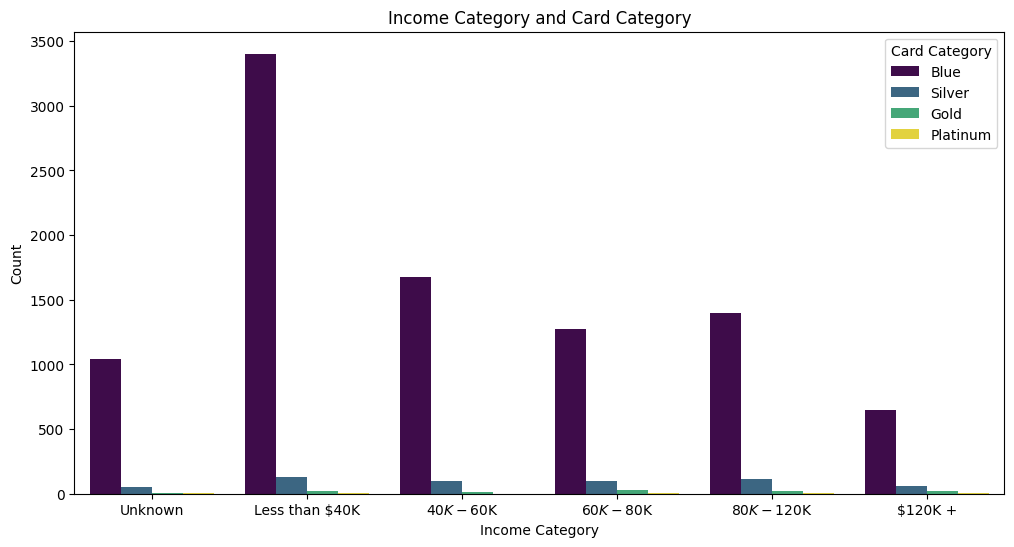

In [33]:
# 7-3 단계 수행: Income_Category와 Card_Category 사이의 관계 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Category', hue='Card_Category', data=bank, palette='viridis', dodge=True)
plt.title('Income Category and Card Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(ticks=range(len(category_names)), labels=category_names)
plt.legend(title='Card Category', labels=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.show()


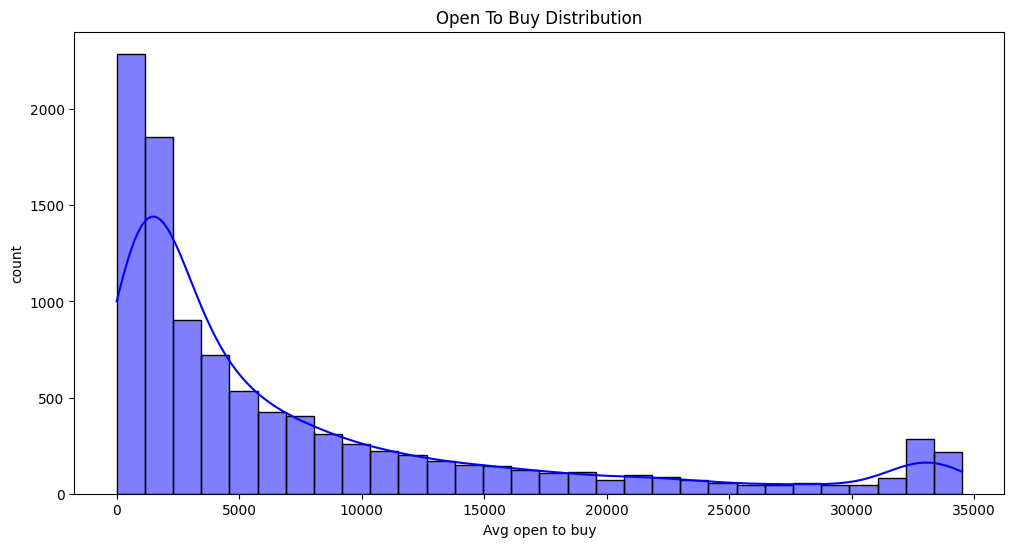

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(bank['Avg_Open_To_Buy'], bins=30, kde=True, color='blue')
plt.title('Open To Buy Distribution')
plt.xlabel('Avg open to buy')
plt.ylabel('count')
plt.show()

<ipython-input-35-38bb0b185d12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income_Category', y='Credit_Limit', data=bank, palette='viridis')


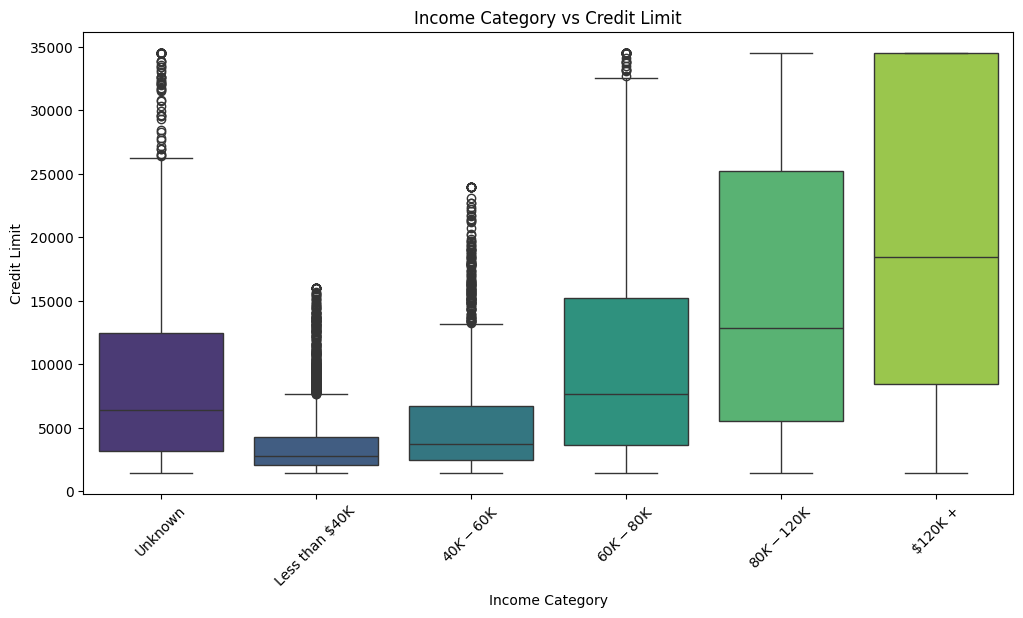

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=bank, palette='viridis')
plt.title('Income Category vs Credit Limit')
plt.xlabel('Income Category')
plt.ylabel('Credit Limit')
plt.xticks(ticks=range(len(category_names)), labels=category_names, rotation=45)
plt.show()

- 이상치가 있긴 하지만 대부분 소득과 유사하게 증가하는 모습을 보임
- 소득 구간이 높아질수록 Q3과 중앙값이 멀어지는 모습

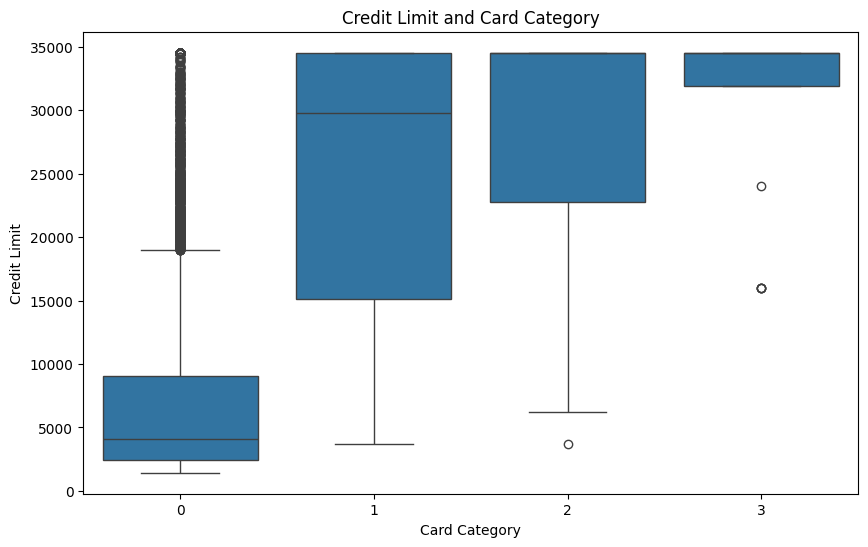

In [36]:
# 소득구간과 카드 종류
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank, x='Card_Category', y='Credit_Limit')
plt.title('Credit Limit and Card Category')
plt.xlabel('Card Category')
plt.ylabel('Credit Limit')
plt.show()

- 제일 낮은 카드(Blue)는 이용자의 절대 다수를 차지해서 그런지 이상치 터지려고 함
- 고급 카드의 한도는 25% 선이 높아짐
- 그치만 2, 3 (Gold, Platinum) 카드는 이용자 수가 너무 적어서 그런가 중앙값조차 보이지 않음

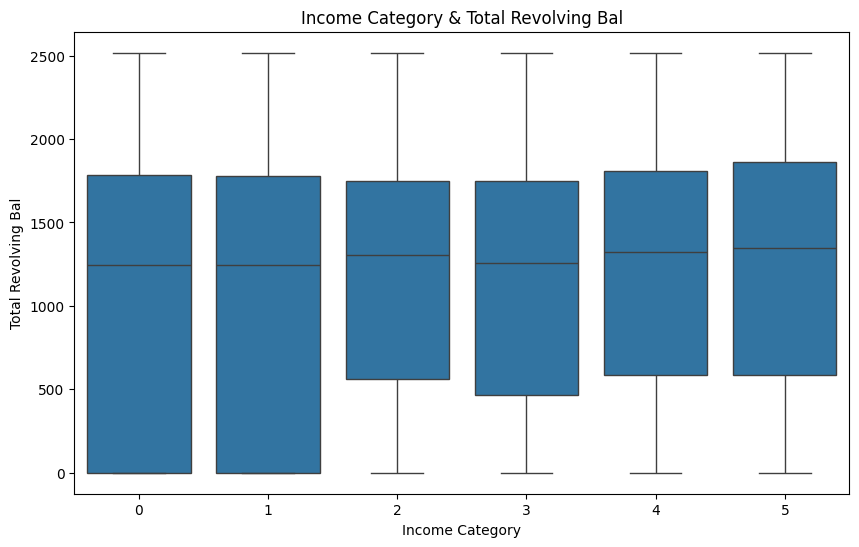

In [37]:
# Income Category와 Total Revolving Bal
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank, x='Income_Category', y='Total_Revolving_Bal')
plt.title('Income Category & Total Revolving Bal')
plt.xlabel('Income Category')
plt.ylabel('Total Revolving Bal')
plt.show()

소득 수준이 딱히 리볼빙 잔액에 큰 영향을 미치지는 않는 것 같음

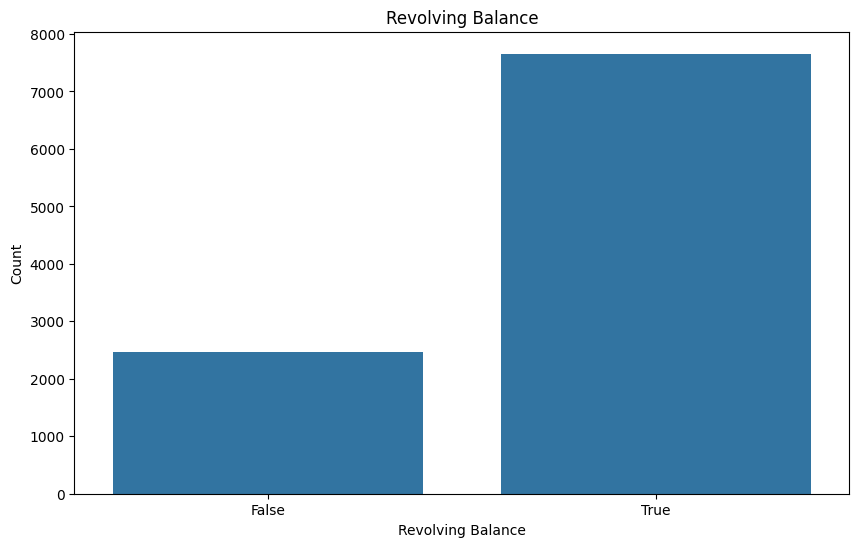

In [38]:
# 리볼빙 잔액이 0이 아닌 경우와 0인 경우로 나누어 분포를 보여주는 그래프
bank['Has_Revolving_Bal'] = bank['Total_Revolving_Bal'] > 0

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='Has_Revolving_Bal')
plt.title('Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Count')
plt.show()

엥 이렇게 많다고? 하고 구글링해 보니까 '개인 신용 한도(PLOC), 주담대(HELOC)'도 리볼빙으로 포함하는 듯

-> 그럼 리볼빙 있다고 소비 습관이 안 좋은 사용자는 아닌 걸로. 오히려 높을 수도 있다.

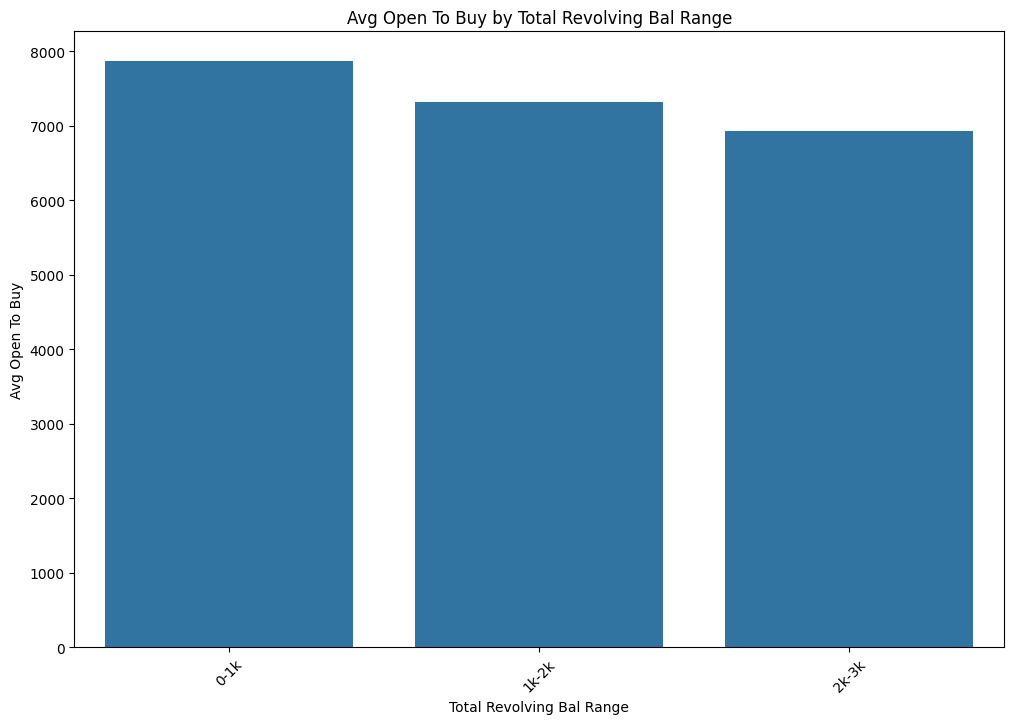

In [39]:
# 리볼빙이랑 평균적으로 남는 한도
bins = [0, 1000, 2000, 3000]
labels = ['0-1k', '1k-2k', '2k-3k']
bank['Revolving_Bal_Bin'] = pd.cut(bank['Total_Revolving_Bal'], bins=bins, labels=labels, right=False)
avg_open_to_buy_by_bin = bank.groupby('Revolving_Bal_Bin')['Avg_Open_To_Buy'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(data=avg_open_to_buy_by_bin, x='Revolving_Bal_Bin', y='Avg_Open_To_Buy')
plt.title('Avg Open To Buy by Total Revolving Bal Range')
plt.xlabel('Total Revolving Bal Range')
plt.ylabel('Avg Open To Buy')
plt.xticks(rotation=45)
plt.show()


- 평균의 평균; 을 구해버렸다
- 일단 이걸로 보자면 리볼빙 잔액이 낮을수록 남은 금액이 높다 (별로 돈을 안 썼다)

<ipython-input-40-3b30ad0f46b1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['Revolving_Bal_Bins'] = pd.cut(mask['Total_Revolving_Bal'], bins=range(0, 1100, 100), right=False)


<Figure size 1000x600 with 0 Axes>

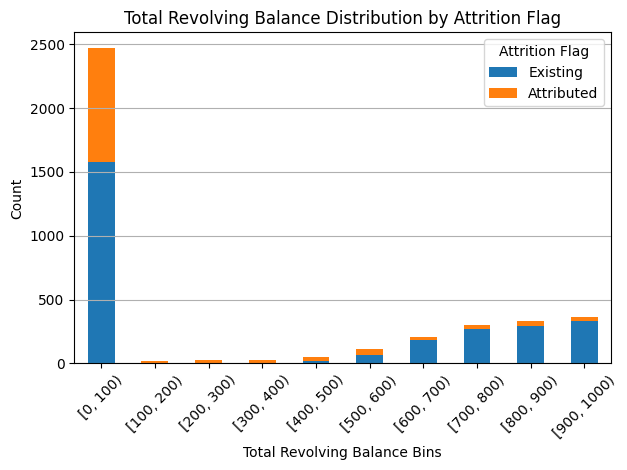

In [40]:
import matplotlib.pyplot as plt

# Filter the data for Total_Revolving_Bal between 0 and 1000
mask = bank[(bank['Total_Revolving_Bal'] >= 0) & (bank['Total_Revolving_Bal'] <= 1000)]

# Bin the Total_Revolving_Bal into 100 unit intervals
mask['Revolving_Bal_Bins'] = pd.cut(mask['Total_Revolving_Bal'], bins=range(0, 1100, 100), right=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = mask.groupby(['Revolving_Bal_Bins', 'Attrition_Flag']).size().unstack().plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Total Revolving Balance Distribution by Attrition Flag')
plt.xlabel('Total Revolving Balance Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag', labels=['Existing', 'Attributed'])
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


평균 잔액 대비 신용 한도를 보자

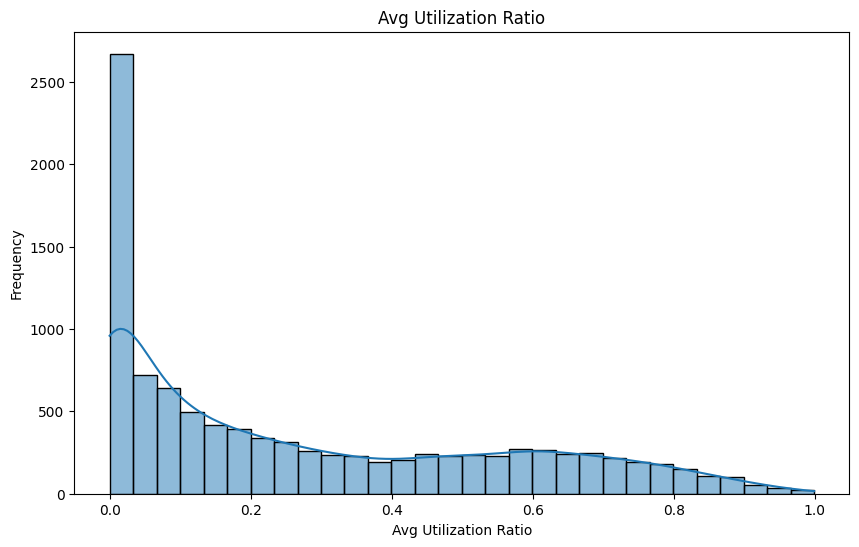

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(bank['Avg_Utilization_Ratio'], bins=30, kde=True)
plt.title('Avg Utilization Ratio')
plt.xlabel('Avg Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


- 내 지식으로는 이게 낮으면 낮을수록 신용 등급이 높은 건데
- 0이라는 건 이탈했을 확률도 있는 거 아님?

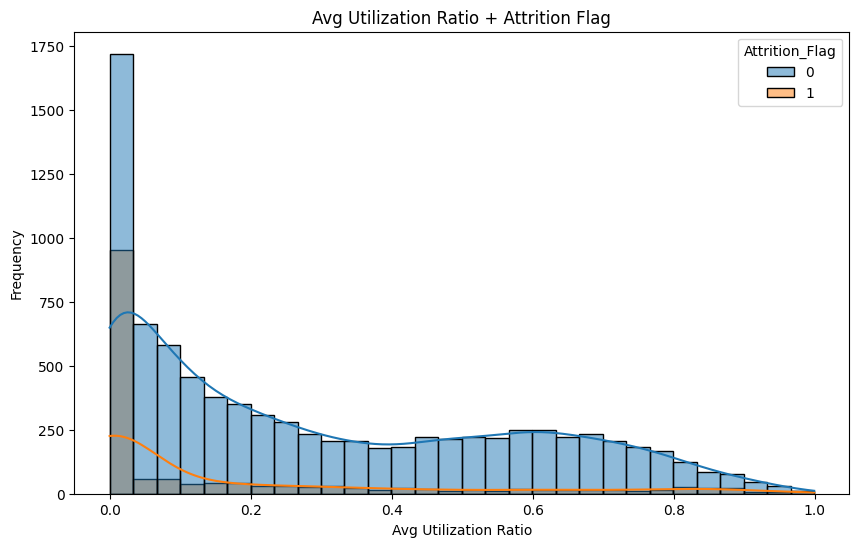

In [42]:
# 한도비율이랑 이탈여부 같이 체크
plt.figure(figsize=(10, 6))
sns.histplot(data=bank, x='Avg_Utilization_Ratio', hue='Attrition_Flag', bins=30, kde=True)
plt.title('Avg Utilization Ratio + Attrition Flag')
plt.xlabel('Avg Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


예상대로 0일 때는 이탈률 절반가량 나옴

<ipython-input-43-8ed0a93413a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=months_on_book_ratio.index, y=months_on_book_ratio.values, palette='muted')


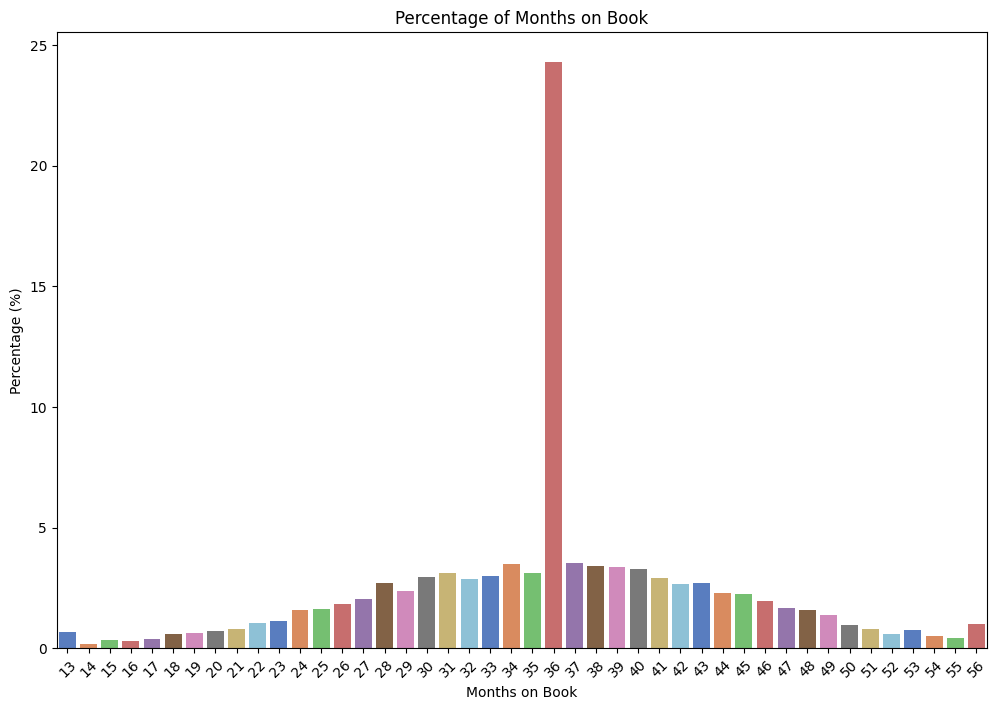

In [43]:
# Months_on_book의 비율 계산
months_on_book_ratio = bank['Months_on_book'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=months_on_book_ratio.index, y=months_on_book_ratio.values, palette='muted')
plt.title('Percentage of Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

3년 전에 무슨 일이 있었던 거지...?

<ipython-input-44-3455c11e63b1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_utilization_by_bin['Months_on_book_Bin'], y=avg_utilization_by_bin['Avg_Utilization_Ratio'], palette='muted')


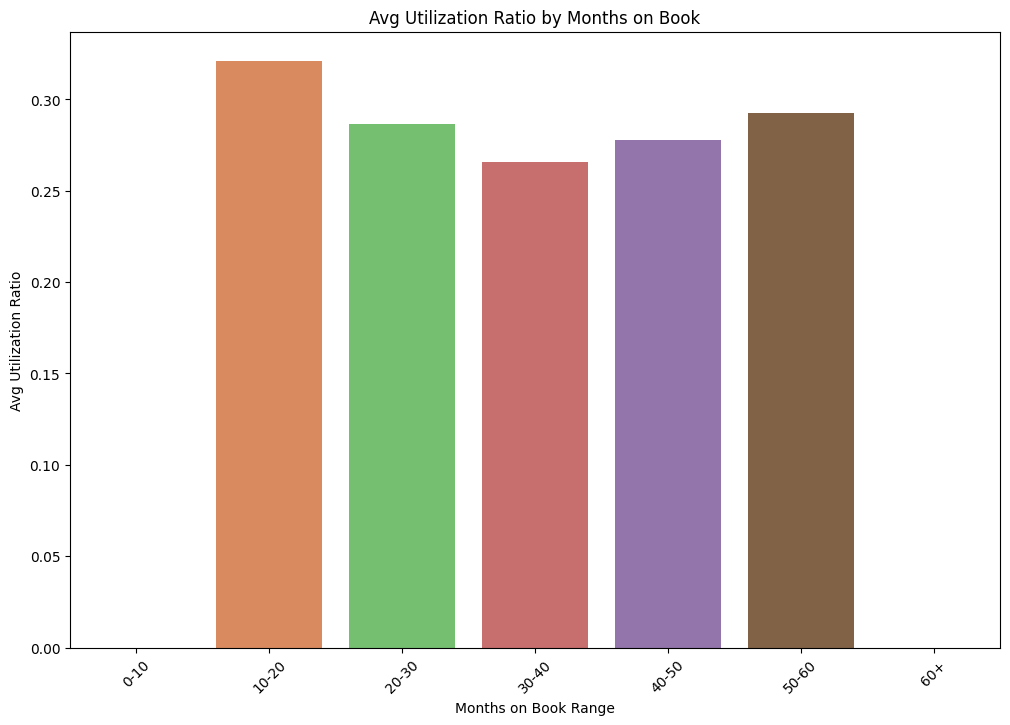

In [44]:
# 유지 개월수가 길면 avg_utilization이 낮아지나?

# Months_on_book 구간 설정
bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
bank['Months_on_book_Bin'] = pd.cut(bank['Months_on_book'], bins=bins, labels=labels, right=False)


avg_utilization_by_bin = bank.groupby('Months_on_book_Bin')['Avg_Utilization_Ratio'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x=avg_utilization_by_bin['Months_on_book_Bin'], y=avg_utilization_by_bin['Avg_Utilization_Ratio'], palette='muted')
plt.title('Avg Utilization Ratio by Months on Book')
plt.xlabel('Months on Book Range')
plt.ylabel('Avg Utilization Ratio')
plt.xticks(rotation=45)
plt.show()


<ipython-input-45-c59b8e0431ec>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_open_to_buy_by_months['Months_on_book_Bin'], y=avg_open_to_buy_by_months['Avg_Open_To_Buy'], palette='muted')


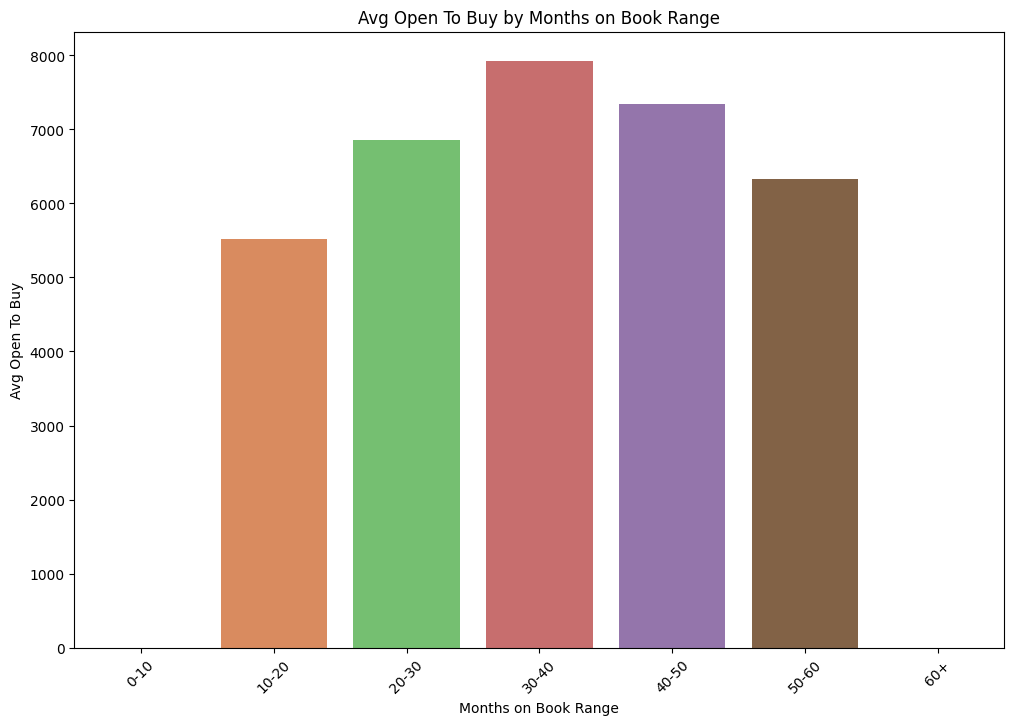

In [45]:
# 각 구간별 Avg_Open_To_Buy의 평균 계산
avg_open_to_buy_by_months = bank.groupby('Months_on_book_Bin')['Avg_Open_To_Buy'].mean().reset_index()

# 시각화 설정
plt.figure(figsize=(12, 8))

# 막대 그래프
sns.barplot(x=avg_open_to_buy_by_months['Months_on_book_Bin'], y=avg_open_to_buy_by_months['Avg_Open_To_Buy'], palette='muted')
plt.title('Avg Open To Buy by Months on Book Range')
plt.xlabel('Months on Book Range')
plt.ylabel('Avg Open To Buy')
plt.xticks(rotation=45)

# 그래프 출력
plt.show()


30~40개월 된 사람들이 OpenToBuy는 높고 리볼빙은 적은 좋은 습관을 보임

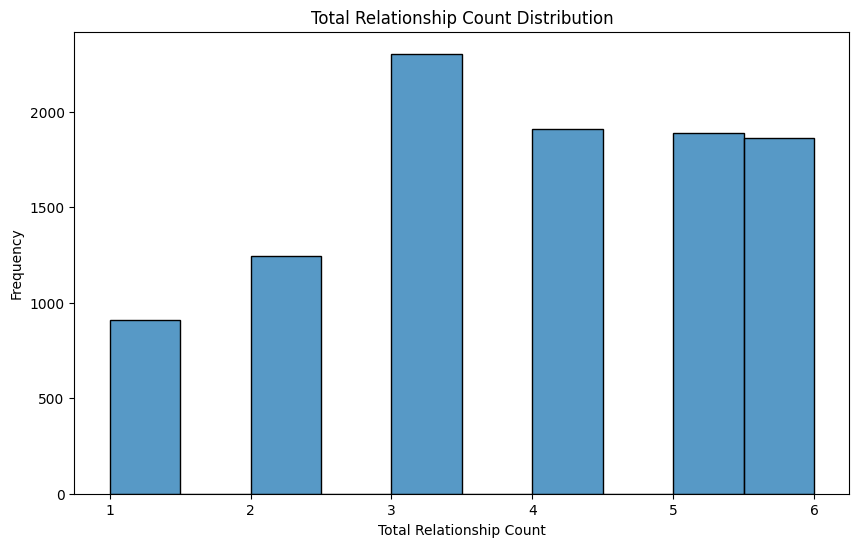

In [46]:
# 상품 수(total_relationship_count)의 빈도 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(bank['Total_Relationship_Count'], bins=10, kde=False)
plt.title('Total Relationship Count Distribution')
plt.xlabel('Total Relationship Count')
plt.ylabel('Frequency')
plt.show()

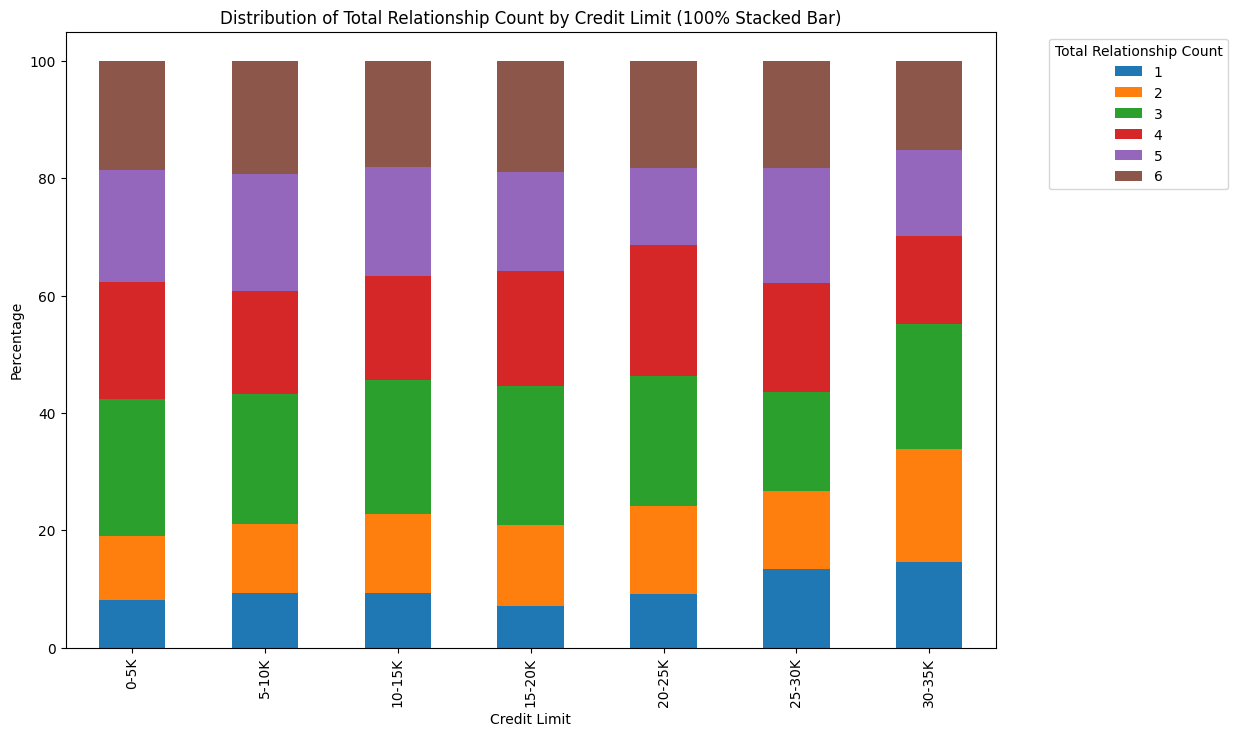

In [47]:
# 신용 한도와 상품 수를 100% 누적 바로 시각화

# 신용 한도 범주화
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000]
labels = ['0-5K', '5-10K', '10-15K', '15-20K', '20-25K', '25-30K', '30-35K', '35-40K', '40-45K', '45-50K', '50-60K']
bank['Credit_Limit_Binned'] = pd.cut(bank['Credit_Limit'], bins=bins, labels=labels, right=False)

# 신용 한도와 총 관계 수의 분포 테이블
relationship_count_dist = pd.crosstab(bank['Credit_Limit_Binned'], bank['Total_Relationship_Count'], normalize='index') * 100

# 100% 누적 막대 그래프
relationship_count_dist.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Total Relationship Count by Credit Limit (100% Stacked Bar)')
plt.xlabel('Credit Limit')
plt.ylabel('Percentage')
plt.legend(title='Total Relationship Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


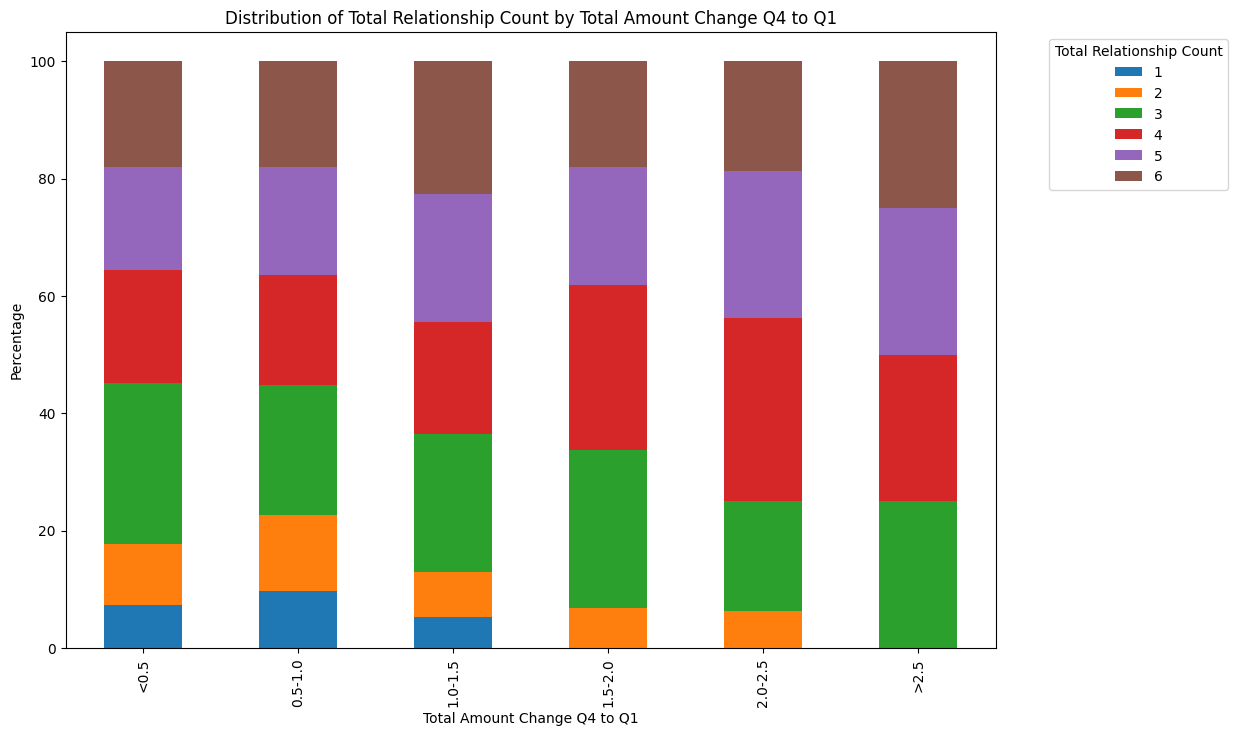

In [48]:
# total_amt_chng_q4_q1과 상품 수의 관계

# total_amt_chng_q4_q1 범주화
bins_amt_chng = [-np.inf, 0.5, 1.0, 1.5, 2.0, 2.5, np.inf]
labels_amt_chng = ['<0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '>2.5']
bank['Total_Amt_Chng_Binned'] = pd.cut(bank['Total_Amt_Chng_Q4_Q1'], bins=bins_amt_chng, labels=labels_amt_chng, right=False)

# total_amt_chng_q4_q1과 총 관계 수의 분포 테이블
amt_chng_dist = pd.crosstab(bank['Total_Amt_Chng_Binned'], bank['Total_Relationship_Count'], normalize='index') * 100

amt_chng_dist.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Total Relationship Count by Total Amount Change Q4 to Q1')
plt.xlabel('Total Amount Change Q4 to Q1')
plt.ylabel('Percentage')
plt.legend(title='Total Relationship Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


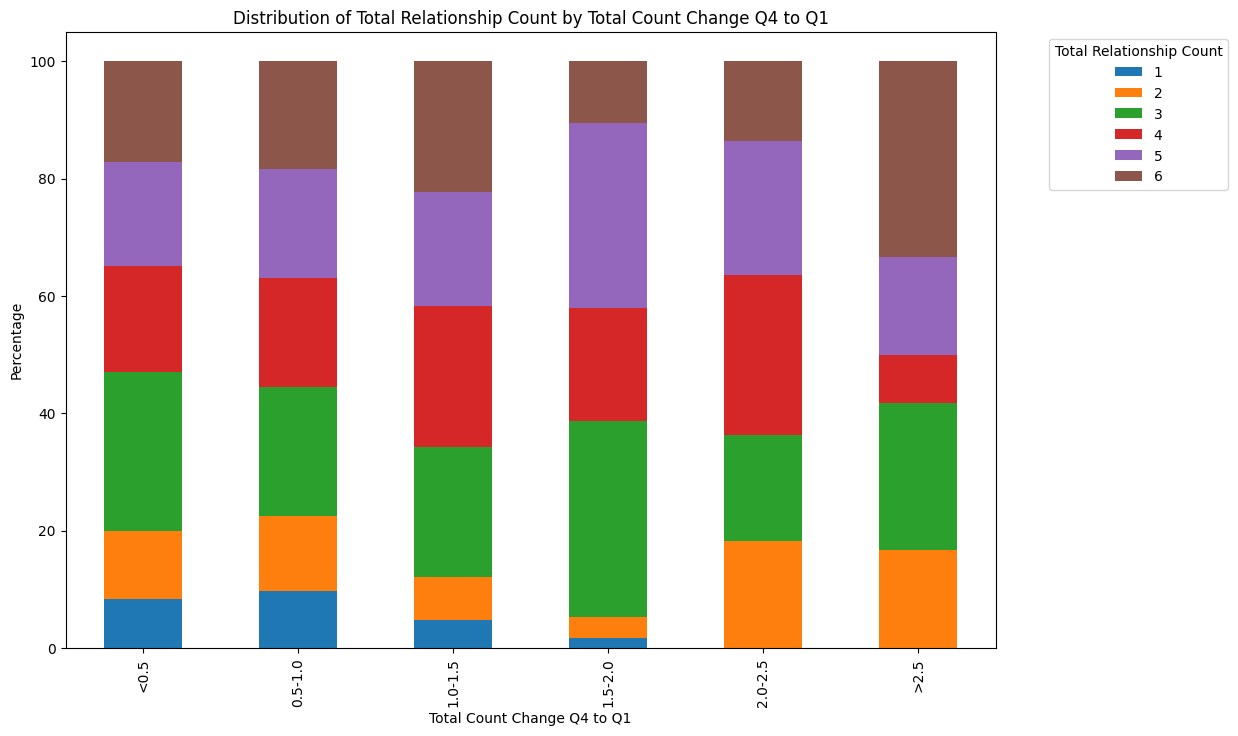

In [49]:
# total_ct_chng_q4_q1과 상품 수의 관계

# total_ct_chng_q4_q1 범주화
bins_ct_chng = [-np.inf, 0.5, 1.0, 1.5, 2.0, 2.5, np.inf]
labels_ct_chng = ['<0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '>2.5']
bank['Total_Ct_Chng_Binned'] = pd.cut(bank['Total_Ct_Chng_Q4_Q1'], bins=bins_ct_chng, labels=labels_ct_chng, right=False)

# total_ct_chng_q4_q1과 총 관계 수의 분포 테이블
ct_chng_dist = pd.crosstab(bank['Total_Ct_Chng_Binned'], bank['Total_Relationship_Count'], normalize='index') * 100

ct_chng_dist.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Total Relationship Count by Total Count Change Q4 to Q1')
plt.xlabel('Total Count Change Q4 to Q1')
plt.ylabel('Percentage')
plt.legend(title='Total Relationship Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


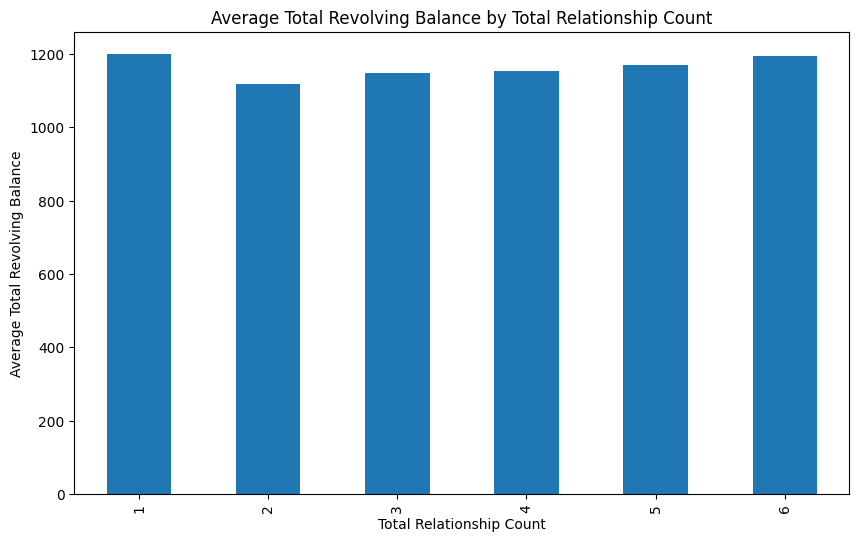

In [50]:
# 상품 건수와 Total_Revolving_Bal을 비교하는 bar plot 생성
# 상품 건수를 기준으로 Total_Revolving_Bal의 평균값을 계산

# 상품 건수 범주화
total_relationship_count_means = bank.groupby('Total_Relationship_Count')['Total_Revolving_Bal'].mean()

# bar plot 생성
plt.figure(figsize=(10, 6))
total_relationship_count_means.plot(kind='bar')
plt.title('Average Total Revolving Balance by Total Relationship Count')
plt.xlabel('Total Relationship Count')
plt.ylabel('Average Total Revolving Balance')
plt.show()


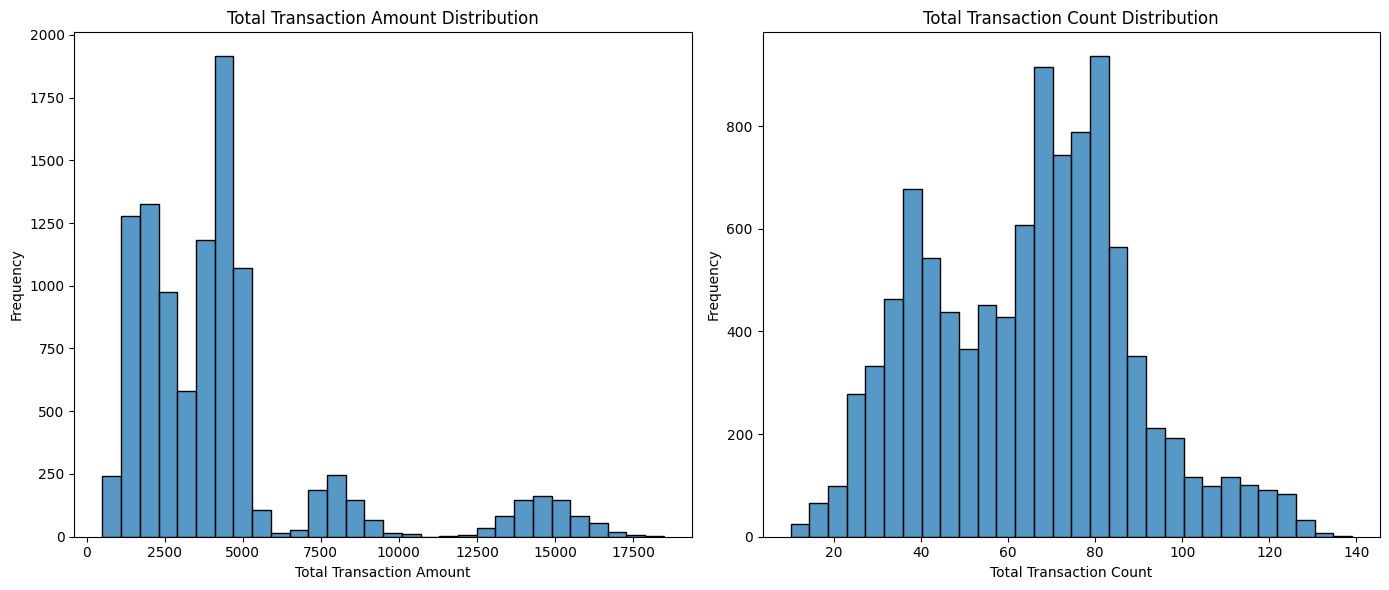

In [51]:
# 거래 금액(total_trans_amt)와 거래 건수(total_trans_ct)의 빈도
plt.figure(figsize=(14, 6))

# 거래 금액 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(bank['Total_Trans_Amt'], bins=30, kde=False)
plt.title('Total Transaction Amount Distribution')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')

# 거래 건수 히스토그램
plt.subplot(1, 2, 2)
sns.histplot(bank['Total_Trans_Ct'], bins=30, kde=False)
plt.title('Total Transaction Count Distribution')
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


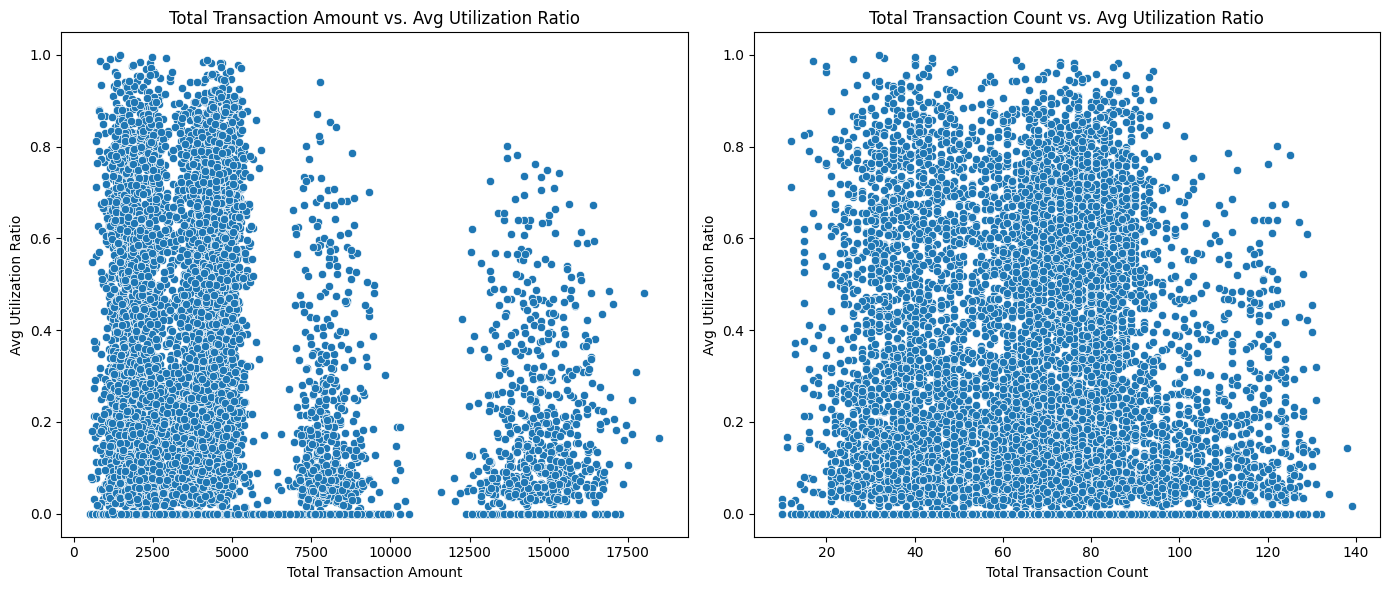

In [52]:
# 거래 금액과 거래 건수가 avg_utilization_ratio와의 관계를 시각화
plt.figure(figsize=(14, 6))

# 거래 금액과 avg_utilization_ratio의 관계
plt.subplot(1, 2, 1)
sns.scatterplot(x='Total_Trans_Amt', y='Avg_Utilization_Ratio', data=bank)
plt.title('Total Transaction Amount vs. Avg Utilization Ratio')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Avg Utilization Ratio')

# 거래 건수와 avg_utilization_ratio의 관계
plt.subplot(1, 2, 2)
sns.scatterplot(x='Total_Trans_Ct', y='Avg_Utilization_Ratio', data=bank)
plt.title('Total Transaction Count vs. Avg Utilization Ratio')
plt.xlabel('Total Transaction Count')
plt.ylabel('Avg Utilization Ratio')

plt.tight_layout()
plt.show()


In [53]:
bank['Total_Relationship_Count'].describe()

count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64

In [54]:
bank['Avg_Utilization_Ratio'].describe()

count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

In [55]:
bank.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,0.470919,2.346203,2.601955,1.536585,2.085711,0.083638,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,1.700417,0.737808,1.474639,0.333784,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,0.000000,2.000000,3.000000,2.000000,2.000000,0.000000,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,1.000000,3.000000,4.000000,2.000000,3.000000,0.000000,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,...,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000
